In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xgboost = pd.read_csv("xgboost.csv")
bloomz = pd.read_csv("bloomz.csv")
roberta = pd.read_csv("roberta.csv")

print(xgboost.head())
# print(bloomz.head())
# print(roberta.head())

          Training dataset/Evaluation dataset Abstract ChatGPT Unnamed: 2  \
0                                         NaN        precision     recall   
1  Abstract - ChatGPT (without preprocessing)            0.887      0.977   
2   Abstract - Bloomz (without preprocessing)            0.479      0.330   
3                          Abstract - Chatgpt            0.882      0.798   
4                           Abstract - Bloomz            0.219      0.080   

  Unnamed: 3 Unnamed: 4 Abstract Bloomz Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0   accuracy         f1       precision     recall   accuracy         f1   
1      0.926      0.929           0.468      0.173      0.488      0.253   
2      0.486      0.391           0.802      0.783      0.795      0.793   
3      0.846      0.838           0.157      0.013      0.471      0.025   
4      0.398      0.117           0.761      0.780      0.768      0.770   

  Abstract Davinci  ... Unnamed: 31 Unnamed: 32 Wiki Davinci Unnamed: 34  \
0   

In [322]:
xgboost.columns = xgboost.columns.to_series().replace('Unnamed:\s\d+',np.nan,regex=True).ffill().values
xgboost.reset_index().T.reset_index().T
print(xgboost)

          Training dataset/Evaluation dataset Abstract ChatGPT  \
0                                         NaN        precision   
1  Abstract - ChatGPT (without preprocessing)            0.887   
2   Abstract - Bloomz (without preprocessing)            0.479   
3                          Abstract - Chatgpt            0.882   
4                           Abstract - Bloomz            0.219   
5                              WiKi - ChatGPT            1.000   
6                               WiKi - Bloomz            0.000   
7       Abstract from \r\n ML papers - Llama3            0.242   
8             Abstract and Wiki - \r\n Bloomz            0.500   
9         Abstract, WiKi and \r\n ML - Bloomz            0.500   

  Abstract ChatGPT Abstract ChatGPT Abstract ChatGPT Abstract Bloomz  \
0           recall         accuracy               f1       precision   
1            0.977            0.926            0.929           0.468   
2            0.330            0.486            0.391     

In [323]:
xgboost = pd.concat([xgboost.columns.to_frame().T, xgboost])
xgboost.columns = range(len(xgboost.columns))
print (xgboost)

                                           0                 1   \
0         Training dataset/Evaluation dataset  Abstract ChatGPT   
0                                         NaN         precision   
1  Abstract - ChatGPT (without preprocessing)             0.887   
2   Abstract - Bloomz (without preprocessing)             0.479   
3                          Abstract - Chatgpt             0.882   
4                           Abstract - Bloomz             0.219   
5                              WiKi - ChatGPT             1.000   
6                               WiKi - Bloomz             0.000   
7       Abstract from \r\n ML papers - Llama3             0.242   
8             Abstract and Wiki - \r\n Bloomz             0.500   
9         Abstract, WiKi and \r\n ML - Bloomz             0.500   

                 2                 3                 4                5   \
0  Abstract ChatGPT  Abstract ChatGPT  Abstract ChatGPT  Abstract Bloomz   
0            recall          accuracy      

In [324]:
xgboost.columns = pd.MultiIndex.from_arrays([xgboost.iloc[0], xgboost.iloc[1]])
 

In [325]:
xgboost = xgboost[2:]  # Drop the first two rows as they are now headers
xgboost.reset_index(drop=True, inplace=True)  # Reset the index for clarity

In [312]:
xgboost.set_index(xgboost.columns[0])

0                                          Abstract ChatGPT                  \
0                                                 precision recall accuracy   
(Training dataset/Evaluation dataset, nan)                                    
Abstract - ChatGPT (without preprocessing)            0.887  0.977    0.926   
Abstract - Bloomz (without preprocessing)             0.479  0.330    0.486   
Abstract - Chatgpt                                    0.882  0.798    0.846   
Abstract - Bloomz                                     0.219  0.080    0.398   
WiKi - ChatGPT                                        1.000  0.000    0.500   
WiKi - Bloomz                                         0.000  0.000    0.497   
Abstract from \r\n ML papers - Llama3                 0.242  0.120    0.372   
Abstract and Wiki - \r\n Bloomz                       0.500  1.000    0.501   
Abstract, WiKi and \r\n ML - Bloomz                   0.500  1.000    0.501   

0                                                 Abstract Bloomz         \
0                                              f1       precision recall   
(Training dataset/Evaluation dataset, nan)                                 
Abstract - ChatGPT (without preprocessing)  0.929           0.468  0.173   
Abstract - Bloomz (without preprocessing)   0.391           0.802  0.783   
Abstract - Chatgpt                          0.838           0.157  0.013   
Abstract - Bloomz                           0.117           0.761  0.780   
WiKi - ChatGPT                              0.000           1.000  0.000   
WiKi - Bloomz                               0.000           0.783  0.030   
Abstract from \r\n ML papers - Llama3       0.160           0.539  0.685   
Abstract and Wiki - \r\n Bloomz             0.667           0.500  0.998   
Abstract, WiKi and \r\n ML - Bloomz         0.667           0.500  0.998   

0                                                          Abstract Davinci  \
0                                          accuracy     f1        precision   
(Training dataset/Evaluation dataset, nan)                                    
Abstract - ChatGPT (without preprocessing)    0.488  0.253            0.492   
Abstract - Bloomz (without preprocessing)     0.795  0.793            0.554   
Abstract - Chatgpt                            0.471  0.025            0.288   
Abstract - Bloomz                             0.768  0.770            0.536   
WiKi - ChatGPT                                0.500  0.000            1.000   
WiKi - Bloomz                                 0.511  0.058            0.600   
Abstract from \r\n ML papers - Llama3         0.550  0.604            0.643   
Abstract and Wiki - \r\n Bloomz               0.499  0.666            0.500   
Abstract, WiKi and \r\n ML - Bloomz           0.499  0.666            0.500   

0                                                  ... Wiki Bloomz         \
0                                          recall  ...    accuracy     f1   
(Training dataset/Evaluation dataset, nan)         ...                      
Abstract - ChatGPT (without preprocessing)  0.243  ...       0.035  0.057   
Abstract - Bloomz (without preprocessing)   0.333  ...       0.488  0.656   
Abstract - Chatgpt                          0.077  ...       0.500  0.003   
Abstract - Bloomz                           0.335  ...       0.611  0.667   
WiKi - ChatGPT                              0.002  ...       0.495  0.007   
WiKi - Bloomz                               0.005  ...       0.883  0.888   
Abstract from \r\n ML papers - Llama3       0.622  ...       0.491  0.000   
Abstract and Wiki - \r\n Bloomz             1.000  ...       0.538  0.677   
Abstract, WiKi and \r\n ML - Bloomz         1.000  ...       0.554  0.687   

0                                          Wiki Davinci                  \
0                                             precision recall accuracy   
(Training dataset/Evaluation dataset, nan)                                
Abstract - ChatGPT (without preprocessi

In [326]:
xgboost.head()

0         Training dataset/Evaluation dataset Abstract ChatGPT         \
0                                         NaN        precision recall   
0  Abstract - ChatGPT (without preprocessing)            0.887  0.977   
1   Abstract - Bloomz (without preprocessing)            0.479  0.330   
2                          Abstract - Chatgpt            0.882  0.798   
3                           Abstract - Bloomz            0.219  0.080   
4                              WiKi - ChatGPT            1.000  0.000   

0                 Abstract Bloomz                        Abstract Davinci  \
0 accuracy     f1       precision recall accuracy     f1        precision   
0    0.926  0.929           0.468  0.173    0.488  0.253            0.492   
1    0.486  0.391           0.802  0.783    0.795  0.793            0.554   
2    0.846  0.838           0.157  0.013    0.471  0.025            0.288   
3    0.398  0.117           0.761  0.780    0.768  0.770            0.536   
4    0.500  0.000           1.000  0.000    0.500  0.000            1.000   

0  ... Wiki Bloomz        Wiki Davinci                        Wiki Cohere  \
0  ...    accuracy     f1    precision recall accuracy     f1   precision   
0  ...       0.035  0.057        0.000  0.000    0.000  0.000       0.000   
1  ...       0.488  0.656        0.482  0.930    0.465  0.635       0.486   
2  ...       0.500  0.003        1.000  0.000    0.500  0.000       1.000   
3  ...       0.611  0.667        0.446  0.418    0.449  0.432       0.443   
4  ...       0.495  0.007        0.990  0.345    0.671  0.512       0.965   

0                         
0 recall accuracy     f1  
0  0.000    0.000  0.000  
1  0.944    0.473  0.642  
2  0.000    0.500  0.000  
3  0.436    0.443  0.439  
4  0.761    0.866  0.851  

[5 rows x 41 columns]

In [314]:
selected_data = xgboost.loc[['Abstract - ChatGPT (without preprocessing)', 'Abstract - Bloomz (without preprocessing)'], ['Abstract ChatGPT', 'Abstract Bloomz']]


KeyError: "None of [Index(['Abstract - ChatGPT (without preprocessing)', 'Abstract - Bloomz (without preprocessing)'], dtype='object')] are in the [index]"

In [318]:
xgboost.head()

0         Training dataset/Evaluation dataset Abstract ChatGPT         \
0                                         NaN        precision recall   
0  Abstract - ChatGPT (without preprocessing)            0.887  0.977   
1   Abstract - Bloomz (without preprocessing)            0.479  0.330   
2                          Abstract - Chatgpt            0.882  0.798   
3                           Abstract - Bloomz            0.219  0.080   
4                              WiKi - ChatGPT            1.000  0.000   

0                 Abstract Bloomz                        Abstract Davinci  \
0 accuracy     f1       precision recall accuracy     f1        precision   
0    0.926  0.929           0.468  0.173    0.488  0.253            0.492   
1    0.486  0.391           0.802  0.783    0.795  0.793            0.554   
2    0.846  0.838           0.157  0.013    0.471  0.025            0.288   
3    0.398  0.117           0.761  0.780    0.768  0.770            0.536   
4    0.500  0.000           1.000  0.000    0.500  0.000            1.000   

0  ... Wiki Bloomz        Wiki Davinci                        Wiki Cohere  \
0  ...    accuracy     f1    precision recall accuracy     f1   precision   
0  ...       0.035  0.057        0.000  0.000    0.000  0.000       0.000   
1  ...       0.488  0.656        0.482  0.930    0.465  0.635       0.486   
2  ...       0.500  0.003        1.000  0.000    0.500  0.000       1.000   
3  ...       0.611  0.667        0.446  0.418    0.449  0.432       0.443   
4  ...       0.495  0.007        0.990  0.345    0.671  0.512       0.965   

0                         
0 recall accuracy     f1  
0  0.000    0.000  0.000  
1  0.944    0.473  0.642  
2  0.000    0.500  0.000  
3  0.436    0.443  0.439  
4  0.761    0.866  0.851  

[5 rows x 41 columns]

In [319]:
xgboost['Training dataset/Evaluation dataset'] = xgboost['Training dataset/Evaluation dataset'].fillna(0)

In [320]:
xgboost.head()

0         Training dataset/Evaluation dataset Abstract ChatGPT         \
0                                         NaN        precision recall   
0  Abstract - ChatGPT (without preprocessing)            0.887  0.977   
1   Abstract - Bloomz (without preprocessing)            0.479  0.330   
2                          Abstract - Chatgpt            0.882  0.798   
3                           Abstract - Bloomz            0.219  0.080   
4                              WiKi - ChatGPT            1.000  0.000   

0                 Abstract Bloomz                        Abstract Davinci  \
0 accuracy     f1       precision recall accuracy     f1        precision   
0    0.926  0.929           0.468  0.173    0.488  0.253            0.492   
1    0.486  0.391           0.802  0.783    0.795  0.793            0.554   
2    0.846  0.838           0.157  0.013    0.471  0.025            0.288   
3    0.398  0.117           0.761  0.780    0.768  0.770            0.536   
4    0.500  0.000           1.000  0.000    0.500  0.000            1.000   

0  ... Wiki Bloomz        Wiki Davinci                        Wiki Cohere  \
0  ...    accuracy     f1    precision recall accuracy     f1   precision   
0  ...       0.035  0.057        0.000  0.000    0.000  0.000       0.000   
1  ...       0.488  0.656        0.482  0.930    0.465  0.635       0.486   
2  ...       0.500  0.003        1.000  0.000    0.500  0.000       1.000   
3  ...       0.611  0.667        0.446  0.418    0.449  0.432       0.443   
4  ...       0.495  0.007        0.990  0.345    0.671  0.512       0.965   

0                         
0 recall accuracy     f1  
0  0.000    0.000  0.000  
1  0.944    0.473  0.642  
2  0.000    0.500  0.000  
3  0.436    0.443  0.439  
4  0.761    0.866  0.851  

[5 rows x 41 columns]

In [316]:
df= xgboost
index = ['Abstract - ChatGPT (without preprocessing)', 'Abstract - Bloomz (without preprocessing)']
df.columns = ['_'.join(col) for col in df.columns]

# Melt the DataFrame to a long format for sns
df_melted = df.reset_index().melt(id_vars='index', var_name='Variable', value_name='Value')

# Rename columns for clarity
df_melted.rename(columns={'index': 'Index'}, inplace=True)

# Plot using sns
sns.barplot(data=df_melted, x='Index', y='Value', hue='Variable')
plt.title("Seaborn Plot from Multirow Header DataFrame")
plt.show()

TypeError: sequence item 1: expected str instance, float found

     Category      
  SubCategory      
            A  B  C
X           1  4  7
Y           2  5  8
Z           3  6  9


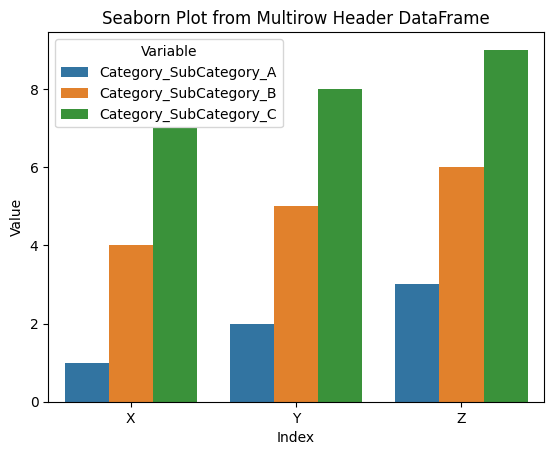

In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame with multirow headers
data = {
    ('Category', 'SubCategory', 'A'): [1, 2, 3],
    ('Category', 'SubCategory', 'B'): [4, 5, 6],
    ('Category', 'SubCategory', 'C'): [7, 8, 9]
}
index = ['X', 'Y', 'Z']
df = pd.DataFrame(data, index=index)
print(df)

# Reset the multi-index columns into flat columns
df.columns = ['_'.join(col) for col in df.columns]

# Melt the DataFrame to a long format for sns
df_melted = df.reset_index().melt(id_vars='index', var_name='Variable', value_name='Value')

# Rename columns for clarity
df_melted.rename(columns={'index': 'Index'}, inplace=True)

# Plot using sns
sns.barplot(data=df_melted, x='Index', y='Value', hue='Variable')
plt.title("Seaborn Plot from Multirow Header DataFrame")
plt.show()


In [288]:
df = selected_data
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x=df.columns[0],
    y=metrics,
    hue=df.index,
    palette="viridis",
)
plt.title("Performance Metrics for ChatGPT and Bloomz")
plt.xlabel("Training/Evaluation Dataset (Without Preprocessing)")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data)

# Add titles and labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Create a DataFrame
df = selected_data
df.index = [
    'Abstract - ChatGPT (without preprocessing)', 
    'Abstract - Bloomz (without preprocessing)'
]

# Flatten the multi-index columns
df.columns = [' '.join(col) for col in df.columns]

# Reset index so that model names are in the column
df_reset = df.reset_index()
df_reset.rename(columns={'index': 'Model'}, inplace=True)

# Reshape the DataFrame to long format
df_melted = pd.melt(df_reset, id_vars=['Model'], var_name='Metric', value_name='Score')

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_melted)

# Add titles and labels
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd

# Sample DataFrame with two rows to be used as headers
data = [
    ['Metric', 'Metric', 'Category', 'Category'],
    ['Value1', 'Value2', 'Label1', 'Label2'],
    [10, 20, 'A', 'B'],
    [15, 25, 'C', 'D']
]

# Create the DataFrame
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Set the first and second rows as column headers
df.columns = pd.MultiIndex.from_arrays([df.iloc[0], df.iloc[1]])
df = df[2:]  # Drop the first two rows as they are now headers
df.reset_index(drop=True, inplace=True)  # Reset the index for clarity

print("\nDataFrame with Multi-Level Column Headers:")
print(df)



Original DataFrame:
        0       1         2         3
0  Metric  Metric  Category  Category
1  Value1  Value2    Label1    Label2
2      10      20         A         B
3      15      25         C         D

DataFrame with Multi-Level Column Headers:
0 Metric        Category       
1 Value1 Value2   Label1 Label2
0     10     20        A      B
1     15     25        C      D
